In [1]:
import sys

sys.path.remove('/usr/local/lib/python3.9/site-packages')
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [2]:
import glob
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Methods


In [3]:
def cal_ndvi(img_r, img_ir):
    return (img_ir - img_r) / (img_ir + img_r + (1e-7)) # avoid zero division error

def date_str_2_datetime(date_str):
    return datetime.datetime.strptime('2020'+date_str, '%Y%m%d')

# Oushu (rice)

In [73]:
s1_path_list = sorted(glob.glob('../sar_2_ndvi/oushu/vegetation_time_series/bin/pixel_resized/s1/s1_*.npy'))
vh_array = []
vv_array = []
s1_date_list = []

for path in s1_path_list:
    img = np.load(path)
    vh_array.append(img[0])
    vv_array.append(img[1])
    
    date_str = path[-8:-4]
    s1_date_list.append(date_str_2_datetime(date_str))
    
vh_array = np.array(vh_array)
vv_array = np.array(vv_array)

print(vh_array.shape)
print(vv_array.shape)

(29, 930, 720)
(29, 930, 720)


In [74]:
s2_path_list = sorted(glob.glob('../sar_2_ndvi/oushu/vegetation_time_series/bin/pixel_resized/s2/*.npy'))
s2_path_list_19 = list(filter(lambda x: '_19_' in x, s2_path_list))
s2_path_list_20 = list(filter(lambda x: '_19_' not in x, s2_path_list))

ndvi_array_20 = []
s2_date_list_20 = []
ndvi_array_19 = []
s2_date_list_19 = []


for path in s2_path_list_20:
    img = np.load(path)
    img_ndvi = cal_ndvi(img[4], img[5])
    ndvi_array_20.append(img_ndvi)
    
    date_str = path[-8:-4]
    s2_date_list_20.append(date_str_2_datetime(date_str))
    
for path in s2_path_list_19:
    img = np.load(path)
    img_ndvi = cal_ndvi(img[4], img[5])
    ndvi_array_19.append(img_ndvi)
    
    date_str = path[-8:-4]
    s2_date_list_19.append(date_str_2_datetime(date_str))
    
ndvi_array_20 = np.array(ndvi_array_20)
ndvi_array_19 = np.array(ndvi_array_19)

print(ndvi_array_20.shape)
print(ndvi_array_19.shape)

(4, 930, 720)
(3, 930, 720)


## Per location

In [72]:
# [410:414, 498:502] -> paddy
# [616:620, 210:214] -> paddy

loc_list = [[410,414,498,502], [616, 620, 210, 214]]

vh_list = [[] for _ in range(len(loc_list))]
vv_list = [[] for _ in range(len(loc_list))]
ndvi_list_20 = [[] for _ in range(len(loc_list))]
ndvi_list_19 = [[] for _ in range(len(loc_list))]

for i,locs in enumerate(loc_list):
    
    for vh, vv in zip(vh_array, vv_array):
        vh_list[i].append(np.mean(vh[locs[0]:locs[1], locs[2]:locs[3]]))
        vv_list[i].append(np.mean(vv[locs[0]:locs[1], locs[2]:locs[3]]))
    
    for ndvi in ndvi_array_20:
        ndvi_list_20[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))
        
    for ndvi in ndvi_array_19:
        ndvi_list_19[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))

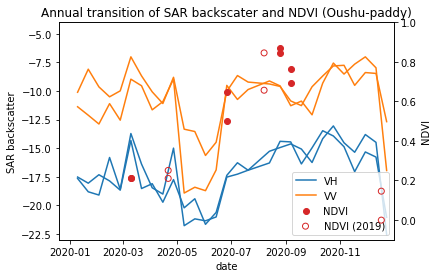

In [130]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

for i in range(len(loc_list)):
    
    if i == 0:
        ln1=ax1.plot(s1_date_list, vh_list[i], color='C0', label='VH')
        ln1=ax1.plot(s1_date_list, vv_list[i], color='C1', label='VV')
        ln2=ax2.scatter(s2_date_list_20, ndvi_list_20[i], color='C3', marker='o', label='NDVI')
        ln2=ax2.scatter(s2_date_list_19, ndvi_list_19[i], color='C3', marker='o',facecolor='None', label='NDVI (2019)')
        
    else:
        ln1=ax1.plot(s1_date_list, vh_list[i], color='C0')
        ln1=ax1.plot(s1_date_list, vv_list[i], color='C1')
        ln2=ax2.scatter(s2_date_list_20, ndvi_list_20[i], color='C3', marker='o')
        ln2=ax2.scatter(s2_date_list_19, ndvi_list_19[i], color='C3', marker='o',facecolor='None')

ax1.set_title('Annual transition of SAR backscater and NDVI (Oushu-paddy)')
ax1.set_xlabel('date')
ax1.set_ylabel('SAR backscatter')
ax2.set_ylabel('NDVI')
ax1.set_xlim(datetime.datetime(2019,12,20), datetime.datetime(2020,12,31))
ax1.set_ylim(-23, -4)
ax2.set_ylim(-0.1, 1)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

## Average

In [75]:
loc_list = [[410,414,498,504], [616, 620, 210, 216]]

vh_list = [[] for _ in range(len(vh_array))]
vv_list = [[] for _ in range(len(vh_array))]
ndvi_list_20 = [[] for _ in range(len(loc_list))]
ndvi_list_19 = [[] for _ in range(len(loc_list))]

for i, (vh, vv) in enumerate(zip(vh_array, vv_array)):
    for locs in loc_list:
        vh_list[i].extend(np.ravel(vh[locs[0]:locs[1], locs[2]:locs[3]]).tolist())
        vv_list[i].extend(np.ravel(vv[locs[0]:locs[1], locs[2]:locs[3]]).tolist())
    
for i,locs in enumerate(loc_list):
    for ndvi in ndvi_array_20:
        ndvi_list_20[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))

    for ndvi in ndvi_array_19:
        ndvi_list_19[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))
        
vv_mean_list = np.array([np.mean(vv) for vv in vv_list])
vh_mean_list = np.array([np.mean(vh) for vh in vh_list])
vv_std_list = np.array([np.std(vv) for vv in vv_list])
vh_std_list = np.array([np.std(vh) for vh in vh_list])

ndvi_list_20 = np.mean(ndvi_list_20, axis=0)
ndvi_list_19 = np.mean(ndvi_list_19, axis=0)

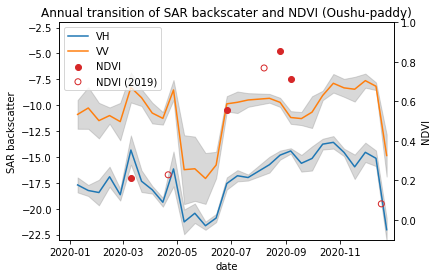

In [78]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ln1=ax1.plot(s1_date_list, vh_mean_list, color='C0', label='VH')
ln1=ax1.plot(s1_date_list, vv_mean_list, color='C1', label='VV')
ln1=ax1.fill_between(s1_date_list, vh_mean_list-vh_std_list, vh_mean_list+vh_std_list, color='grey', alpha=0.3)
ln1=ax1.fill_between(s1_date_list, vv_mean_list-vv_std_list, vv_mean_list+vv_std_list, color='grey', alpha=0.3)

ln2=ax2.scatter(s2_date_list_20, ndvi_list_20, color='C3', marker='o', label='NDVI')
ln2=ax2.scatter(s2_date_list_19, ndvi_list_19, color='C3', marker='o',facecolor='None', label='NDVI (2019)')
    
ax1.set_title('Annual transition of SAR backscater and NDVI (Oushu-paddy)')
ax1.set_xlabel('date')
ax1.set_ylabel('SAR backscatter')
ax2.set_ylabel('NDVI')
ax1.set_xlim(datetime.datetime(2019,12,20), datetime.datetime(2020,12,31))
ax1.set_ylim(-23, -2)
ax2.set_ylim(-0.1, 1)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='upper left')

# Tsumagoi (cabbage)

In [64]:
s1_path_list = sorted(glob.glob('../sar_2_ndvi/tsumagoi/vegetation_time_series/bin/pixel_resized/s1/s1_*.npy'))
vh_array = []
vv_array = []
s1_date_list = []

for path in s1_path_list:
    img = np.load(path)
    vh_array.append(img[0])
    vv_array.append(img[1])
    
    date_str = path[-8:-4]
    s1_date_list.append(date_str_2_datetime(date_str))
    
vh_array = np.array(vh_array)
vv_array = np.array(vv_array)

print(vh_array.shape)
print(vv_array.shape)

s2_path_list = sorted(glob.glob('../sar_2_ndvi/tsumagoi/vegetation_time_series/bin/pixel_resized/s2/*.npy'))
s2_path_list_19 = list(filter(lambda x: '_19_' in x, s2_path_list))
s2_path_list_20 = list(filter(lambda x: '_19_' not in x, s2_path_list))

ndvi_array_20 = []
s2_date_list_20 = []
ndvi_array_19 = []
s2_date_list_19 = []


for path in s2_path_list_20:
    img = np.load(path)
    img_ndvi = cal_ndvi(img[4], img[5])
    ndvi_array_20.append(img_ndvi)
    
    date_str = path[-8:-4]
    s2_date_list_20.append(date_str_2_datetime(date_str))
    
for path in s2_path_list_19:
    img = np.load(path)
    img_ndvi = cal_ndvi(img[4], img[5])
    ndvi_array_19.append(img_ndvi)
    
    date_str = path[-8:-4]
    s2_date_list_19.append(date_str_2_datetime(date_str))
    
ndvi_array_20 = np.array(ndvi_array_20)
ndvi_array_19 = np.array(ndvi_array_19)

print(ndvi_array_20.shape)
print(ndvi_array_19.shape)

(30, 573, 1016)
(30, 573, 1016)
(9, 573, 1016)
(8, 573, 1016)


## Per location

In [132]:
# [490:494, 830: 834] # orange
# [409:413, 370:374] # blue 

loc_list = [[490,494,830,834], [409,413,370,374]]

vh_list = [[] for _ in range(len(loc_list))]
vv_list = [[] for _ in range(len(loc_list))]
ndvi_list_20 = [[] for _ in range(len(loc_list))]
ndvi_list_19 = [[] for _ in range(len(loc_list))]

for i,locs in enumerate(loc_list):
    
    for vh, vv in zip(vh_array, vv_array):
        vh_list[i].append(np.mean(vh[locs[0]:locs[1], locs[2]:locs[3]]))
        vv_list[i].append(np.mean(vv[locs[0]:locs[1], locs[2]:locs[3]]))
    
    for ndvi in ndvi_array_20:
        ndvi_list_20[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))
        
    for ndvi in ndvi_array_19:
        ndvi_list_19[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))

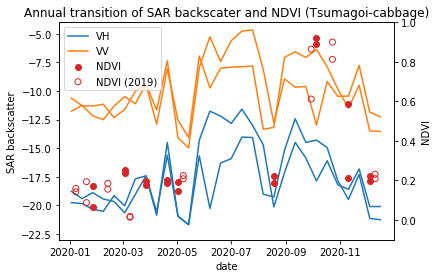

In [133]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

for i in range(len(loc_list)):
    
    if i == 0:
        ln1=ax1.plot(s1_date_list, vh_list[i], color='C0', label='VH')
        ln1=ax1.plot(s1_date_list, vv_list[i], color='C1', label='VV')
        ln2=ax2.scatter(s2_date_list_20, ndvi_list_20[i], color='C3', marker='o', label='NDVI')
        ln2=ax2.scatter(s2_date_list_19, ndvi_list_19[i], color='C3', marker='o',facecolor='None', label='NDVI (2019)')
        
    else:
        ln1=ax1.plot(s1_date_list, vh_list[i], color='C0')
        ln1=ax1.plot(s1_date_list, vv_list[i], color='C1')
        ln2=ax2.scatter(s2_date_list_20, ndvi_list_20[i], color='C3', marker='o')
        ln2=ax2.scatter(s2_date_list_19, ndvi_list_19[i], color='C3', marker='o',facecolor='None')

ax1.set_title('Annual transition of SAR backscater and NDVI (Tsumagoi-cabbage)')
ax1.set_xlabel('date')
ax1.set_ylabel('SAR backscatter')
ax2.set_ylabel('NDVI')
ax1.set_xlim(datetime.datetime(2019,12,20), datetime.datetime(2020,12,31))
ax1.set_ylim(-23, -4)
ax2.set_ylim(-0.1, 1)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

## Average

In [68]:
loc_list = [[132, 136, 309, 312], [35, 39, 516, 520]] # [[482,494,830,834], [409,413,370,376]]

vh_list = [[] for _ in range(len(vh_array))]
vv_list = [[] for _ in range(len(vh_array))]
ndvi_list_20 = [[] for _ in range(len(loc_list))]
ndvi_list_19 = [[] for _ in range(len(loc_list))]

for i, (vh, vv) in enumerate(zip(vh_array, vv_array)):
    for locs in loc_list:
        vh_list[i].extend(np.ravel(vh[locs[0]:locs[1], locs[2]:locs[3]]).tolist())
        vv_list[i].extend(np.ravel(vv[locs[0]:locs[1], locs[2]:locs[3]]).tolist())
    
for i,locs in enumerate(loc_list):
    for ndvi in ndvi_array_20:
        ndvi_list_20[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))

    for ndvi in ndvi_array_19:
        ndvi_list_19[i].append(np.mean(ndvi[locs[0]:locs[1], locs[2]:locs[3]]))
        
vv_mean_list = np.array([np.mean(vv) for vv in vv_list])
vh_mean_list = np.array([np.mean(vh) for vh in vh_list])
vv_std_list = np.array([np.std(vv) for vv in vv_list])
vh_std_list = np.array([np.std(vh) for vh in vh_list])

ndvi_list_20 = np.mean(ndvi_list_20, axis=0)
ndvi_list_19 = np.mean(ndvi_list_19, axis=0)

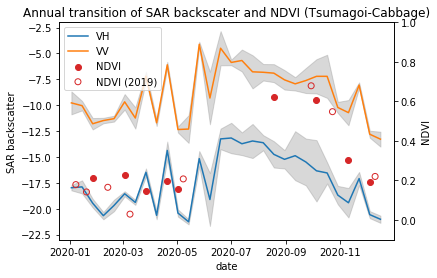

In [71]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ln1=ax1.plot(s1_date_list, vh_mean_list, color='C0', label='VH')
ln1=ax1.plot(s1_date_list, vv_mean_list, color='C1', label='VV')
ln1=ax1.fill_between(s1_date_list, vh_mean_list-vh_std_list, vh_mean_list+vh_std_list, color='grey', alpha=0.3)
ln1=ax1.fill_between(s1_date_list, vv_mean_list-vv_std_list, vv_mean_list+vv_std_list, color='grey', alpha=0.3)

ln2=ax2.scatter(s2_date_list_20, ndvi_list_20, color='C3', marker='o', label='NDVI')
ln2=ax2.scatter(s2_date_list_19, ndvi_list_19, color='C3', marker='o',facecolor='None', label='NDVI (2019)')
    
ax1.set_title('Annual transition of SAR backscater and NDVI (Tsumagoi-Cabbage)')
ax1.set_xlabel('date')
ax1.set_ylabel('SAR backscatter')
ax2.set_ylabel('NDVI')
ax1.set_xlim(datetime.datetime(2019,12,20), datetime.datetime(2020,12,31))
ax1.set_ylim(-23, -2)
ax2.set_ylim(-0.1, 1)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)